# Task 1: Histogram equalization

In [54]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [55]:
IMAGES_FOLDER = os.path.join(".", "images")

In [56]:
def get_image_channel_histogram(image):
    return np.array(cv2.calcHist([image], [0], None, [256], [0, 256]))

In [57]:
def plot_grayscale_image(image, title):
    plt.imshow(image, cmap="gray")
    plt.title(os.path.basename(title))
    plt.axis("off")
    plt.show()

In [58]:
def plot_grayscale_histogram(hist, title):
    plt.figure(figsize=(8, 4))
    plt.plot(hist, color="black")
    plt.title(title)
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 255])
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

In [59]:
def show_grayscale_equalization_hist_comparison(image, title, hist_equalization_fn):
    equalized_image = hist_equalization_fn(image)

    hist_original = get_image_channel_histogram(image)
    hist_equalized = get_image_channel_histogram(equalized_image)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    fig.suptitle(title, fontsize=14)

    axes[0, 0].imshow(image, cmap="gray")
    axes[0, 0].set_title("Original image")
    axes[0, 0].axis("off")

    axes[0, 1].plot(hist_original, color="black")
    axes[0, 1].set_title("Original histogram")

    axes[1, 0].imshow(equalized_image, cmap="gray")
    axes[1, 0].set_title("Equalized image")
    axes[1, 0].axis("off")

    axes[1, 1].plot(hist_equalized, color="black")
    axes[1, 1].set_title("Equalized histogram")

    plt.tight_layout()
    plt.show()

### Histogram equalization

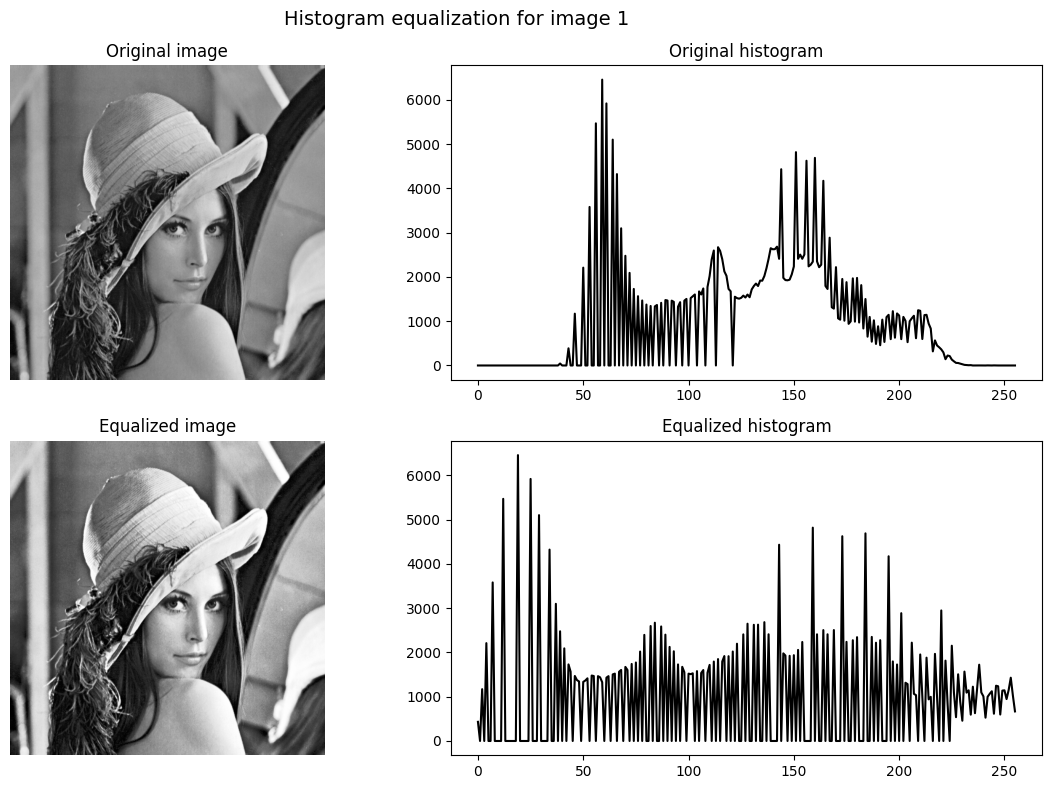

In [60]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_1_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(image, title="Histogram equalization for image 1", hist_equalization_fn=cv2.equalizeHist)

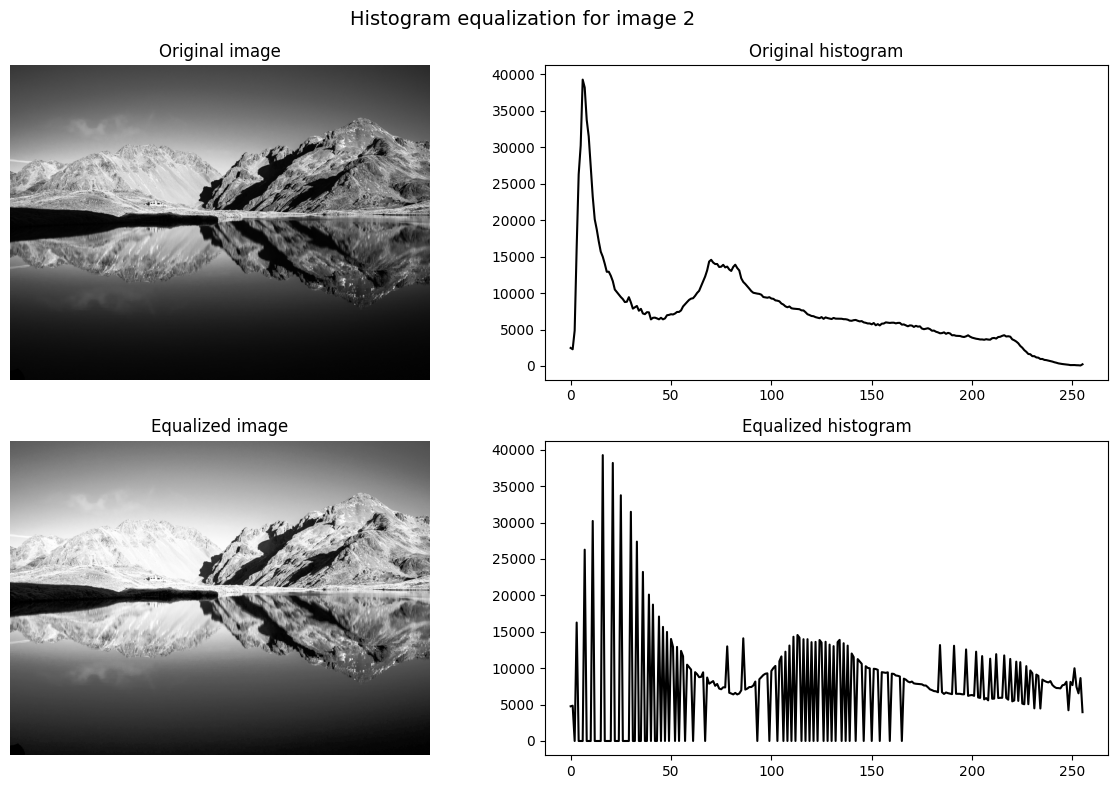

In [61]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_2_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(image, title="Histogram equalization for image 2", hist_equalization_fn=cv2.equalizeHist)

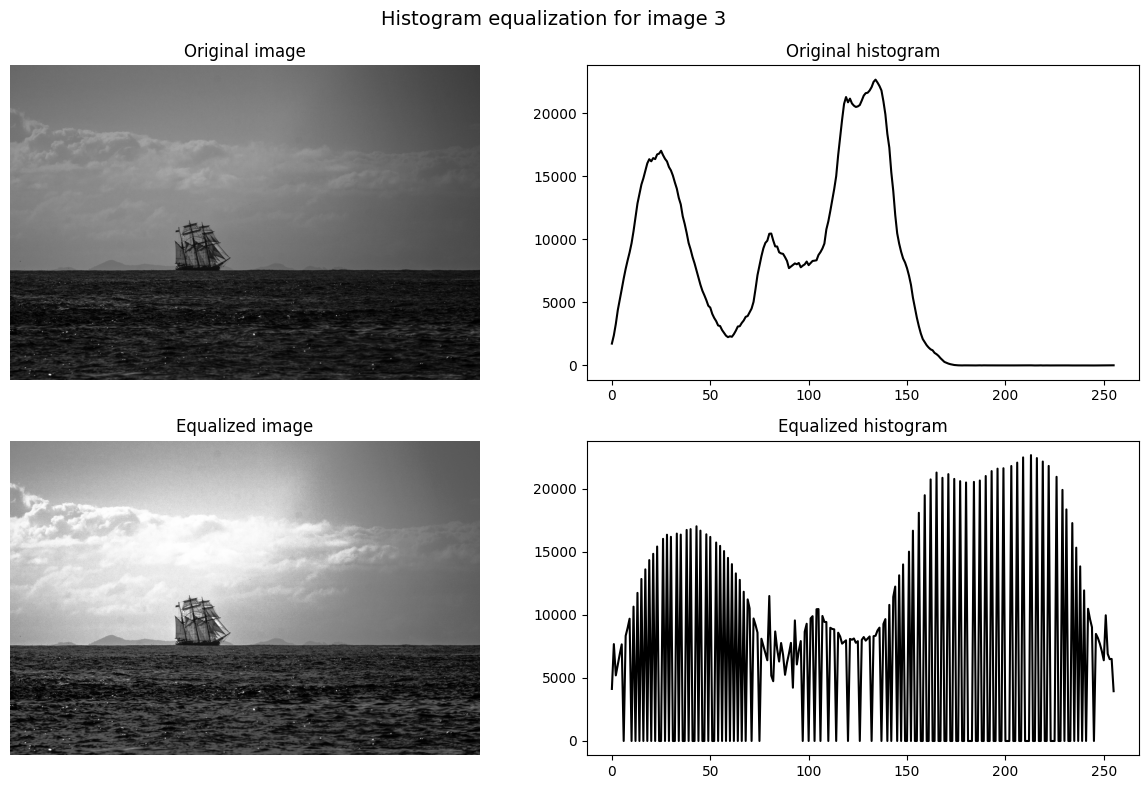

In [62]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_3_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(image, title="Histogram equalization for image 3", hist_equalization_fn=cv2.equalizeHist)

### CLAHE algorithm

In [63]:
def clahe_grayscale(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    return clahe.apply(image)

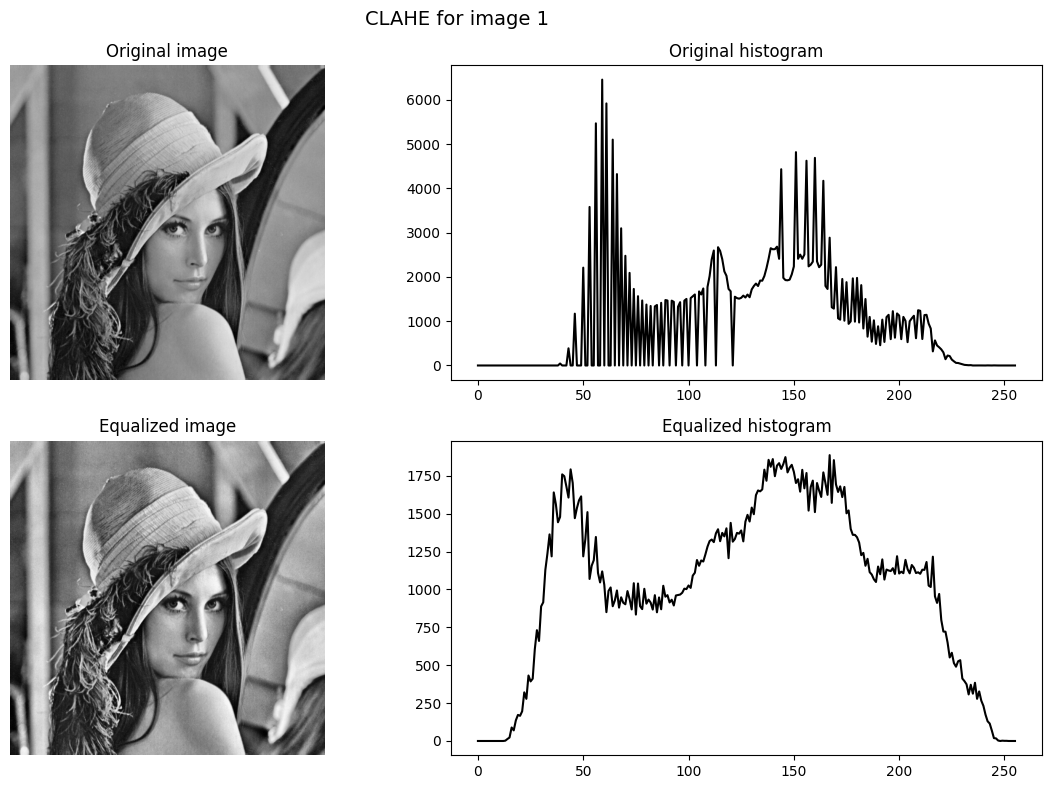

In [64]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_1_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(
    image,
    title="CLAHE for image 1",
    hist_equalization_fn=lambda img: clahe_grayscale(img, clip_limit=2.0, tile_grid_size=(8, 8))
)

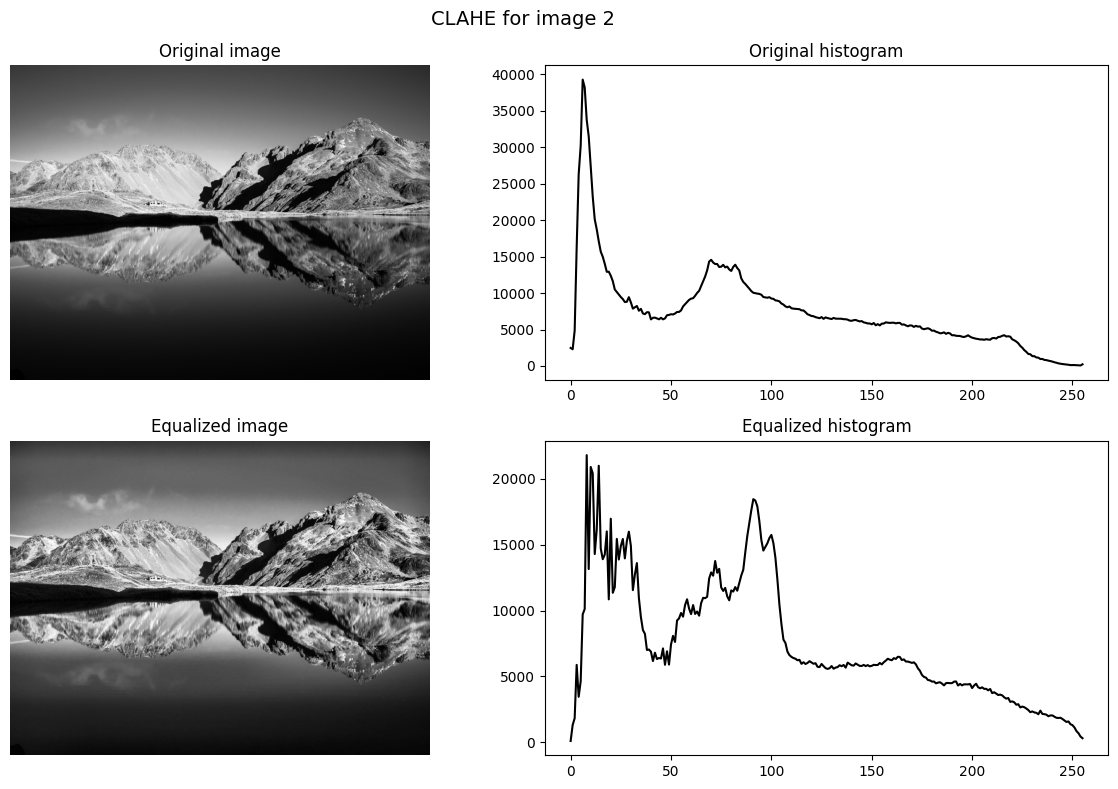

In [65]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_2_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(
    image,
    title="CLAHE for image 2",
    hist_equalization_fn=lambda img: clahe_grayscale(img, clip_limit=2.0, tile_grid_size=(8, 8))
)

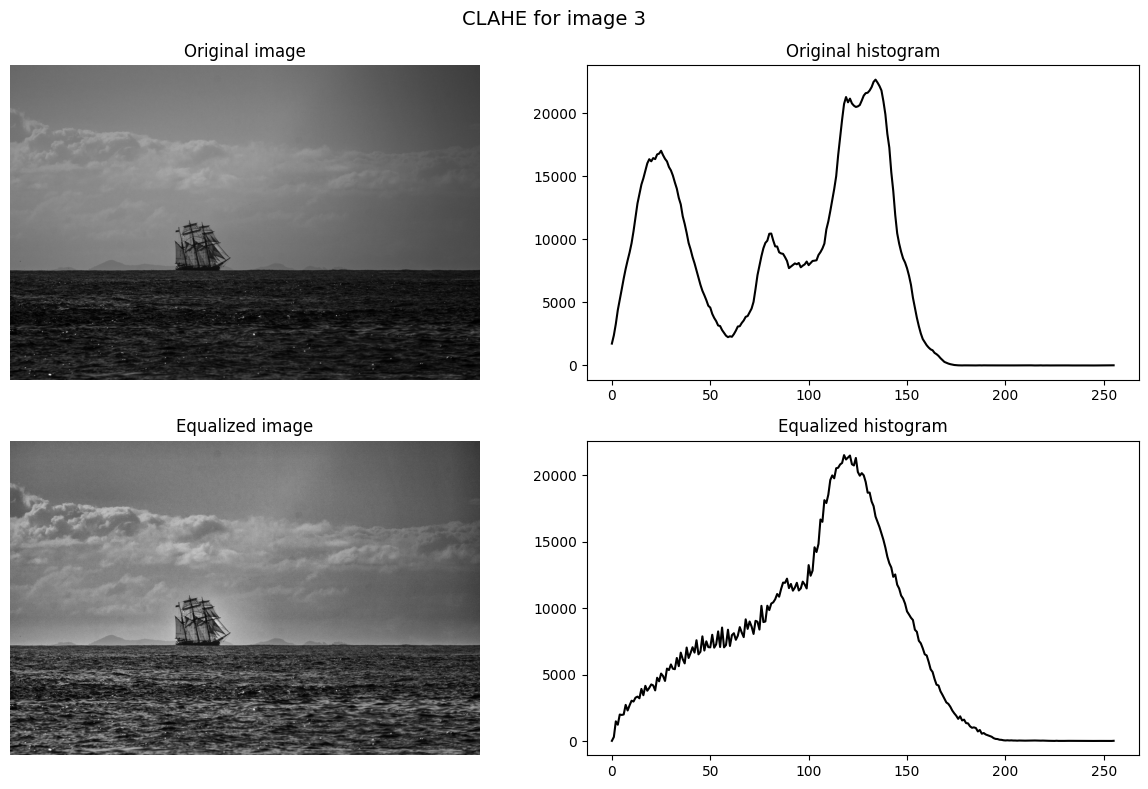

In [66]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_3_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(
    image,
    title="CLAHE for image 3",
    hist_equalization_fn=lambda img: clahe_grayscale(img, clip_limit=2.0, tile_grid_size=(8, 8))
)

### Color image processing 

In [67]:
def read_color_image(path_to_image):
    return cv2.cvtColor(cv2.imread(path_to_image), cv2.COLOR_BGR2RGB)

In [68]:
def get_color_image_histogram(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_image[:, :, 0] = cv2.equalizeHist(lab_image[:, :, 0])
    equalized_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
    
    return equalized_image

In [69]:
def show_color_equalization_hist_comparison(image, title, hist_equalization_fn):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(title, fontsize=14)

    axes[0, 0].imshow(image)
    axes[0, 0].set_title("Original image")
    axes[0, 0].axis("off")

    colors = ['red', 'green', 'blue']
    
    for i, color in enumerate(colors):
        hist = get_image_channel_histogram(image[:, :, i])
        axes[0, 1].plot(hist, color=color, label=color, alpha=0.7)
        
    axes[0, 1].set_title("Original RGB histogram")
    axes[0, 1].set_xlim([0, 255])
    axes[0, 1].set_xlabel("Pixel intensity")
    axes[0, 1].set_ylabel("Frequency")
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    equalized_image = hist_equalization_fn(image)
    axes[1, 0].imshow(equalized_image)
    axes[1, 0].set_title("Equalized image")
    axes[1, 0].axis("off")

    for i, color in enumerate(colors):
        hist = get_image_channel_histogram(equalized_image[:, :, i])
        axes[1, 1].plot(hist, color=color, label=color, alpha=0.7)
    
    axes[1, 1].set_title("Equalized RGB histogram")
    axes[1, 1].set_xlim([0, 255])
    axes[1, 1].set_xlabel("Pixel intensity")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

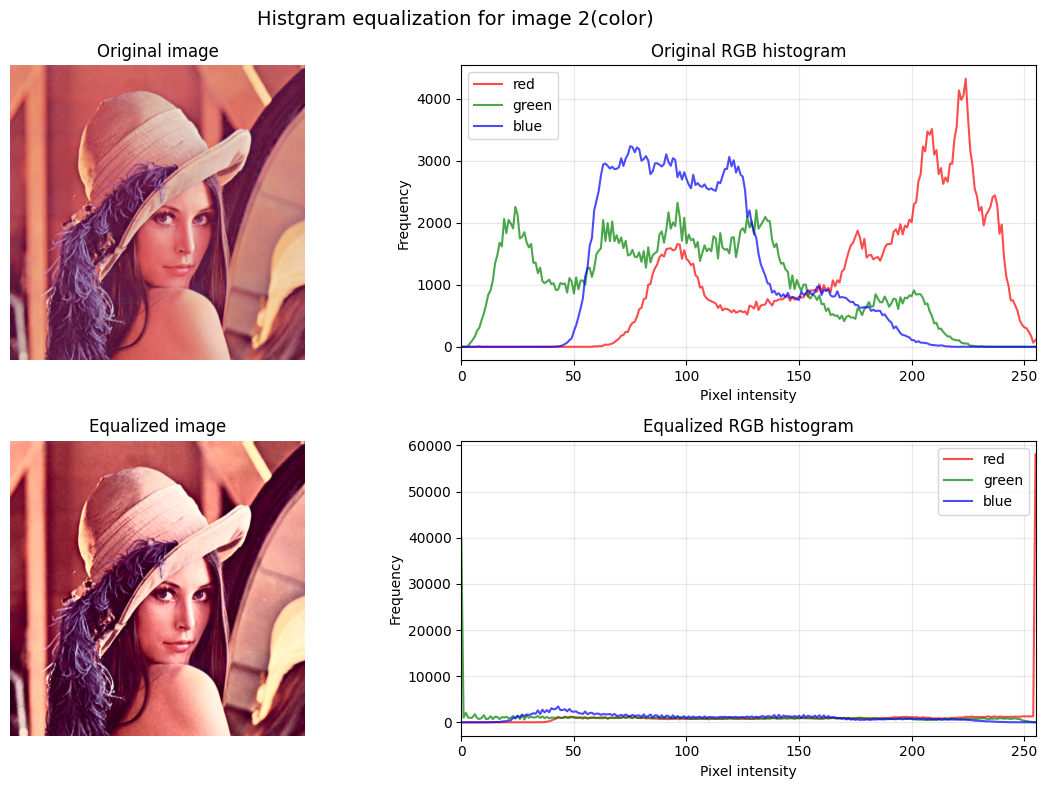

In [70]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "image_1_color.png"))
show_color_equalization_hist_comparison(
    image,
    title="Histgram equalization for image 2(color)",
    hist_equalization_fn=get_color_image_histogram
)

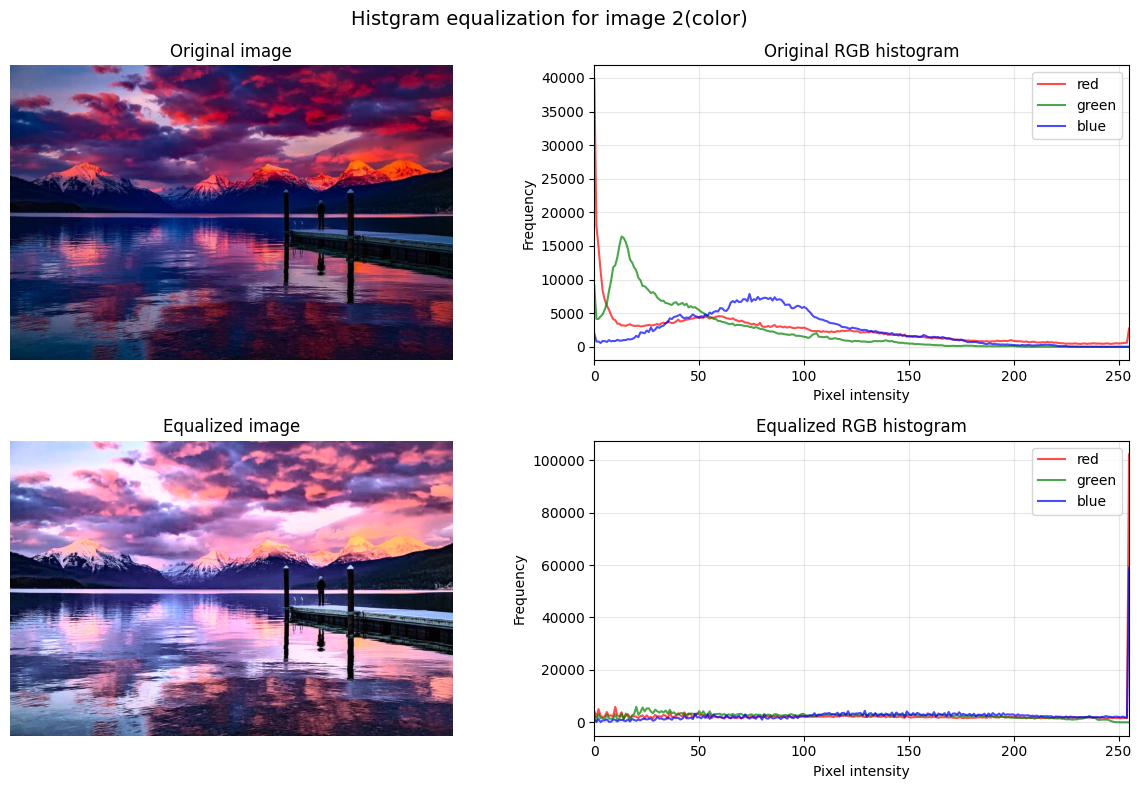

In [71]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "image_2_color.png"))
show_color_equalization_hist_comparison(
    image,
    title="Histgram equalization for image 2(color)",
    hist_equalization_fn=get_color_image_histogram
)

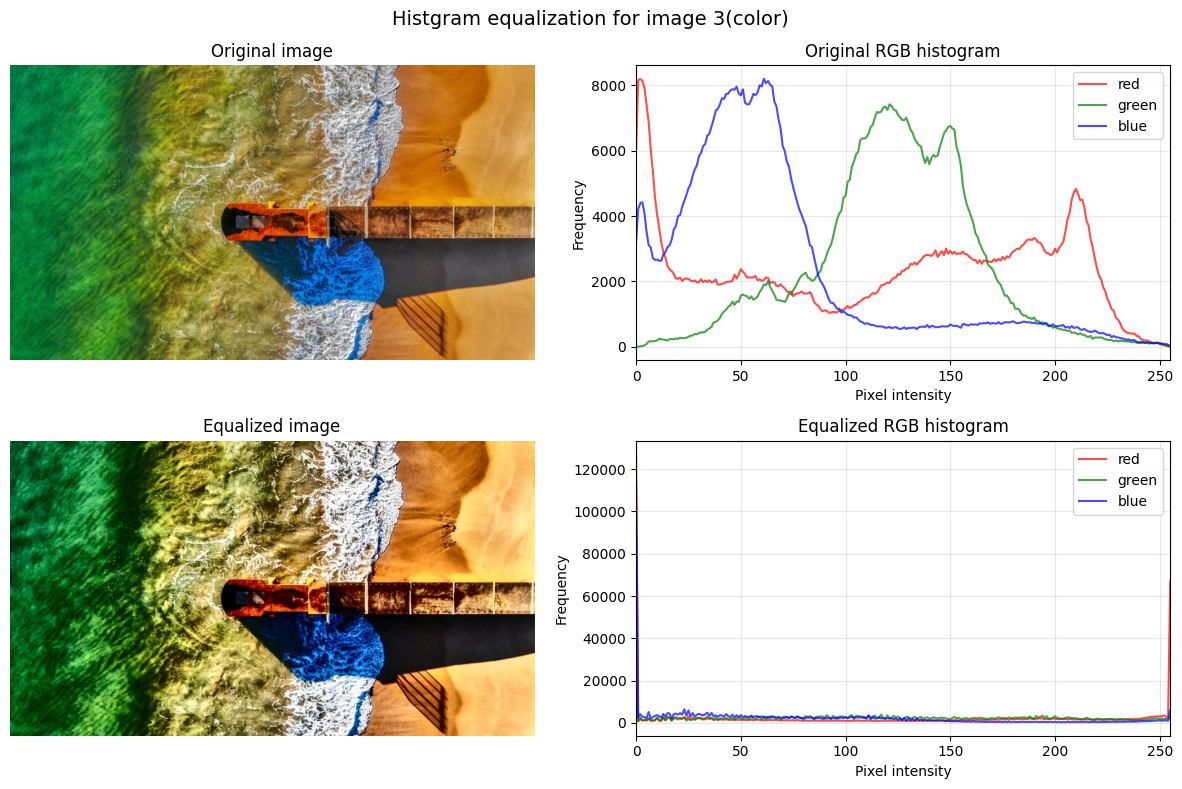

In [72]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "image_3_color.png"))
show_color_equalization_hist_comparison(
    image,
    title="Histgram equalization for image 3(color)",
    hist_equalization_fn=get_color_image_histogram
)

In [73]:
def clahe_color(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    
    return cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

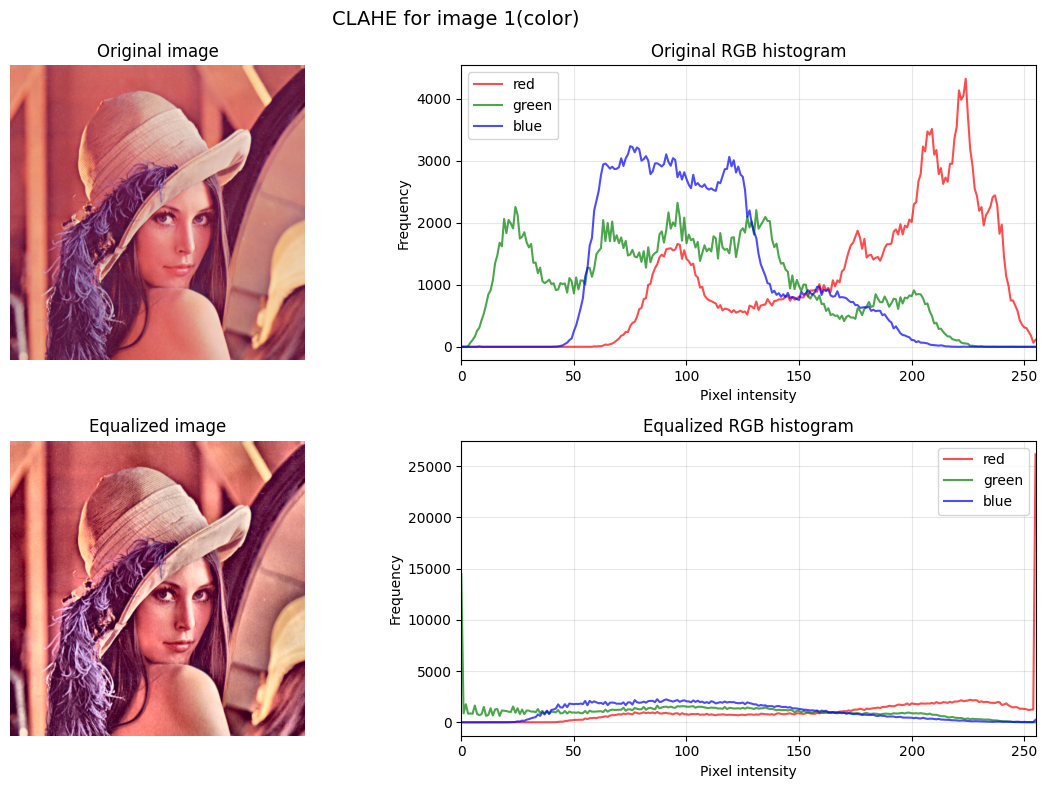

In [74]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "image_1_color.png"))
show_color_equalization_hist_comparison(
    image,
    title="CLAHE for image 1(color)",
    hist_equalization_fn=lambda img: clahe_color(img, clip_limit=2.0, tile_grid_size=(8, 8))
)

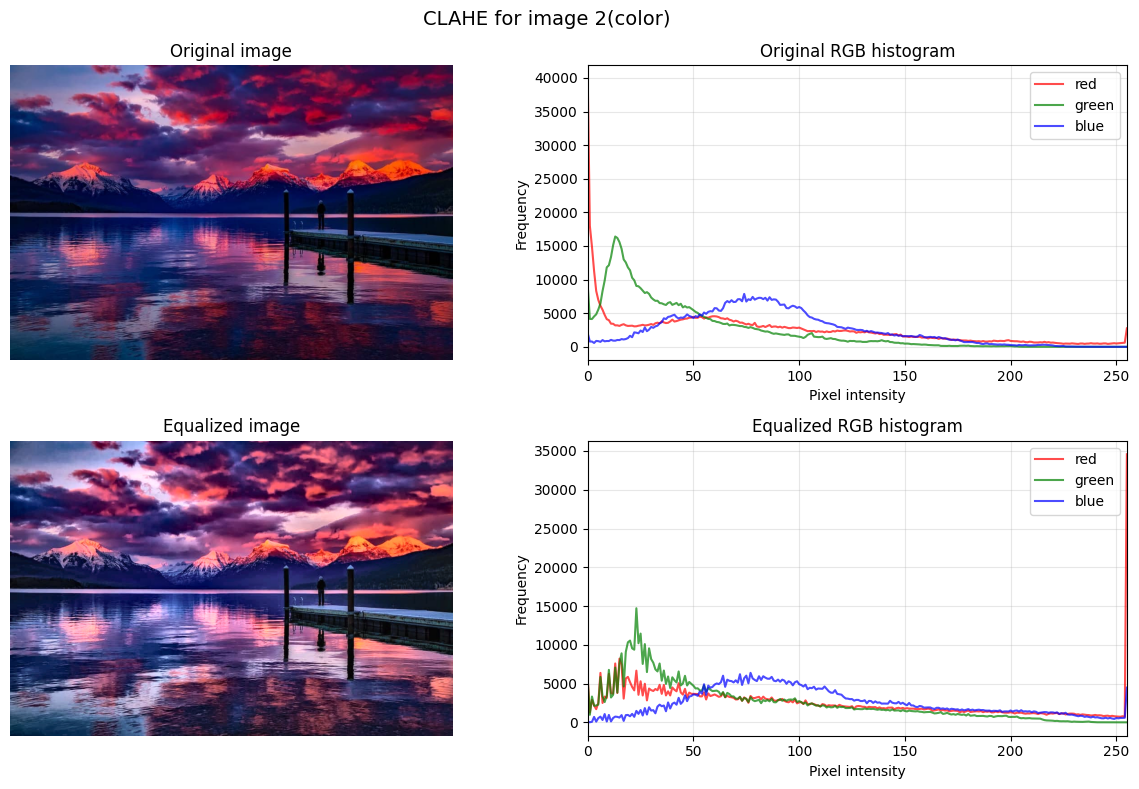

In [75]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "image_2_color.png"))
show_color_equalization_hist_comparison(
    image,
    title="CLAHE for image 2(color)",
    hist_equalization_fn=lambda img: clahe_color(img, clip_limit=2.0, tile_grid_size=(8, 8))
)

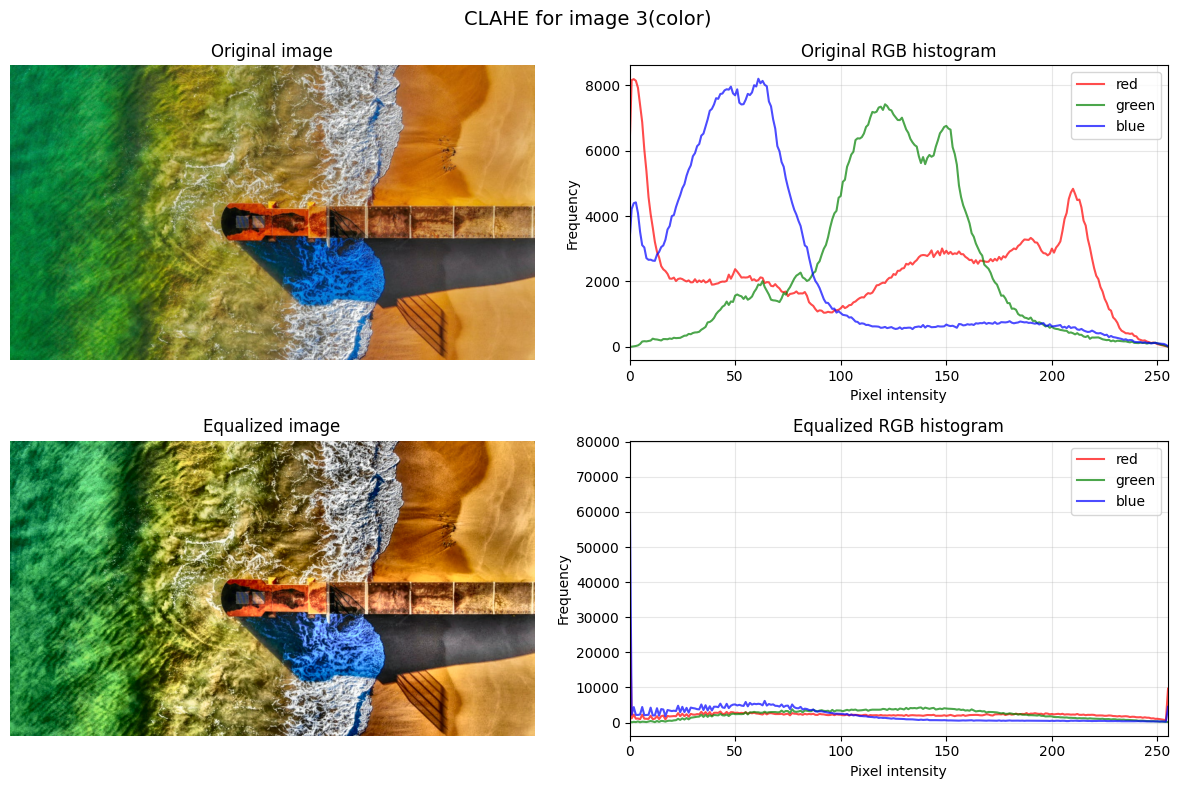

In [76]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "image_3_color.png"))
show_color_equalization_hist_comparison(
    image,
    title="CLAHE for image 3(color)",
    hist_equalization_fn=lambda img: clahe_color(img, clip_limit=2.0, tile_grid_size=(8, 8))
)

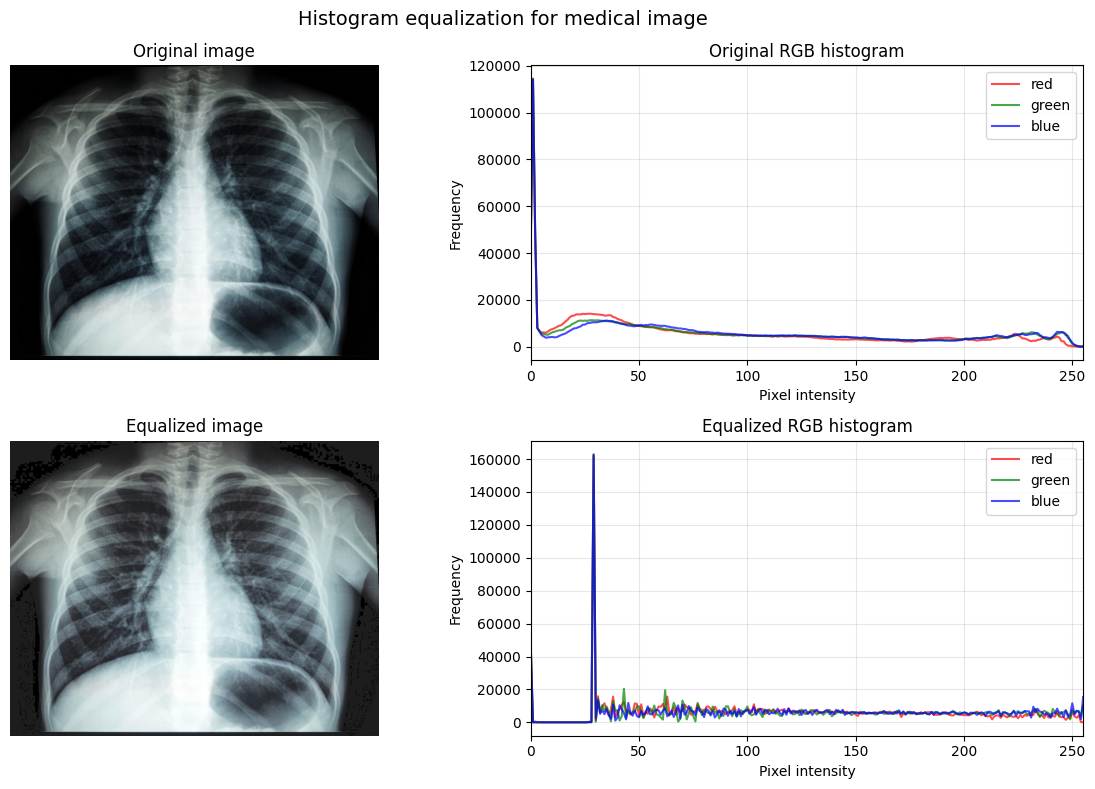

In [79]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "medical_image.png"))
show_color_equalization_hist_comparison(
    image,
    title="Histogram equalization for medical image",
    hist_equalization_fn=get_color_image_histogram
)

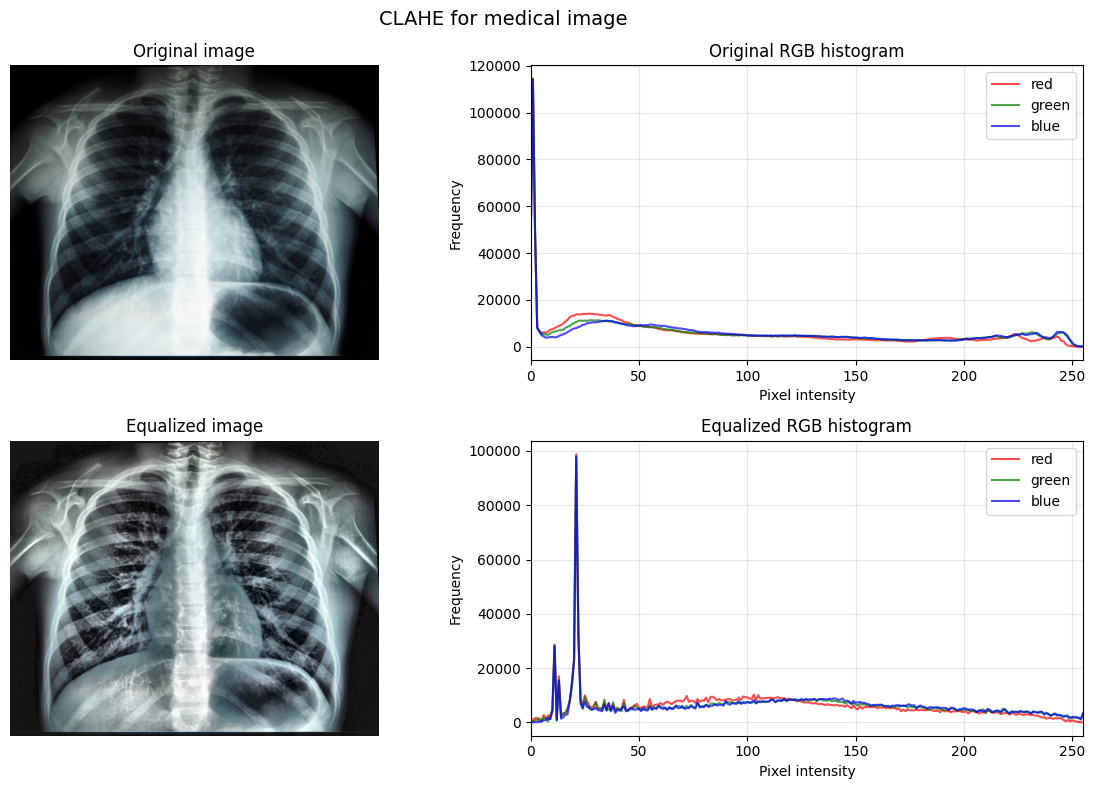

In [78]:
image = read_color_image(os.path.join(IMAGES_FOLDER, "medical_image.png"))
show_color_equalization_hist_comparison(
    image,
    title="CLAHE for medical image",
    hist_equalization_fn=lambda img: clahe_color(img, clip_limit=8.0, tile_grid_size=(8, 8))
)